In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt

import rose

plt.style.use('science')
gr = (1 + np.sqrt(5)) / 2
h = 3

In [2]:
energy = 50 # MeV
theta = np.array([200, -91.85])
training_points = np.array([
    [119.51219512195122, -14.634146341463415],
    [139.02439024390245, -4.878048780487805],
    [158.53658536585365, -48.78048780487805],
    [178.0487804878049, -117.07317073170732],
    [197.5609756097561, -131.70731707317074],
    [217.0731707317073, -126.82926829268293],
    [236.58536585365854, -82.92682926829268],
    [256.0975609756098, -175.609756097561],
    [275.609756097561, -19.51219512195122],
    [295.1219512195122, -170.73170731707316]
])

In [3]:
rbe = rose.ReducedBasisEmulator(
    rose.MN_Potential,
    training_points,
    energy,
    0
)

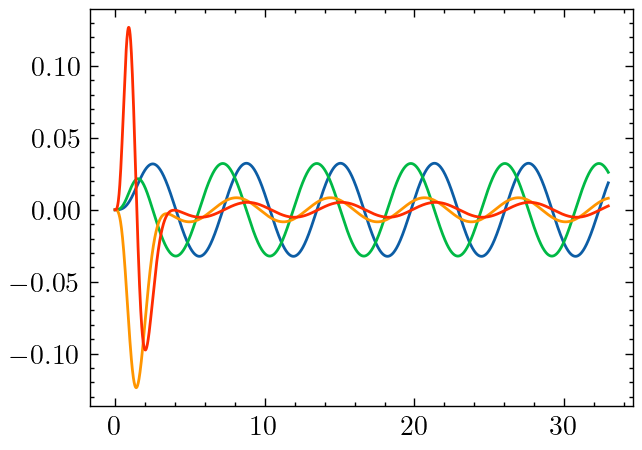

In [4]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

for row in rbe.basis.vectors.T:
    ax.plot(rbe.s_mesh, np.real(row))

In [5]:
%%time
phi_hat = rbe.emulate_wave_function(theta)

CPU times: user 168 µs, sys: 64 µs, total: 232 µs
Wall time: 226 µs


In [6]:
%%time
phi_exact = rbe.se.phi(energy, theta, rbe.s_mesh, 0)

CPU times: user 105 ms, sys: 2.64 ms, total: 107 ms
Wall time: 106 ms


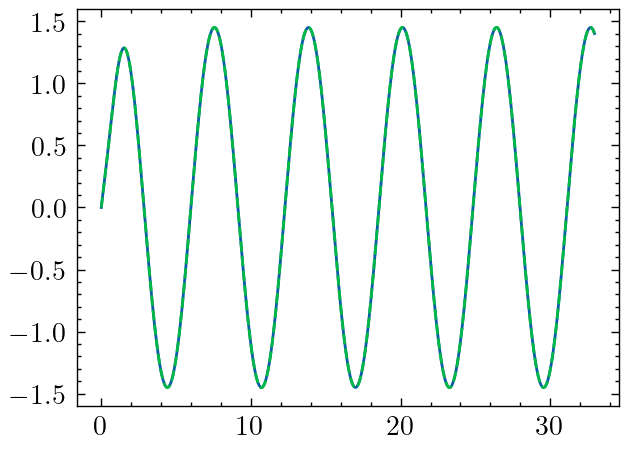

In [7]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')
ax.plot(rbe.s_mesh, np.real(phi_hat))
ax.plot(rbe.s_mesh, np.real(phi_exact), linestyle='--');

In [8]:
rbe.run_metrics('benchmark_data_MN_Potential_E_50.00_MeV.pkl', verbose=True);

Wave function residuals (root of sum of squares):
50% and 95% quantiles
1.6474e+01  5.3629e+01
Phase shift residuals (relative difference):
50% and 95% quantiles
1.8333e-03  4.5422e-03
Maximum phase shift residuals
8.1640e-03


In [14]:
%%time
rbe.emulate_phase_shift(theta)

CPU times: user 293 µs, sys: 45 µs, total: 338 µs
Wall time: 296 µs


(0.2938805469116905+1.3877787807814457e-17j)

In [10]:
%%time
rose.free_solutions.phase_shift_interp(rbe.emulate_wave_function(theta), rbe.s_mesh, 0, rbe.s_0)

CPU times: user 1.58 ms, sys: 1.17 ms, total: 2.75 ms
Wall time: 2.53 ms


(0.29388054610392866-4.163336342344337e-17j)

In [16]:
%%time
rose.free_solutions.phase_shift_interp(rbe.se.phi(energy, theta, rbe.s_mesh, 0), rbe.s_mesh, 0, rbe.s_0)

CPU times: user 116 ms, sys: 3.41 ms, total: 119 ms
Wall time: 117 ms


(0.2937020507776746-1.3877787807814457e-17j)